# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [15]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import requests

In [18]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
response = requests.get(url)
response.raise_for_status()

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [19]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(response.text, 'html.parser')



In [21]:
# Extract all rows of data
table = soup.find('table', class_='table')
headers = [header.text for header in table.find_all('th')]
rows = table.find_all('tr')[1:]
data = [[cell.text.strip() for cell in row.find_all('td')] for row in rows]



### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [23]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_weather_df = pd.DataFrame(data, columns=headers)
mars_weather_df['id'] = mars_weather_df['id'].astype(int)
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])
mars_weather_df['sol'] = mars_weather_df['sol'].astype(int)
mars_weather_df['ls'] = mars_weather_df['ls'].astype(float)
mars_weather_df['month'] = mars_weather_df['month'].astype(int)
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype(float)
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype(float)


In [24]:
# Confirm DataFrame was created successfully
mars_weather_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155.0,6,-75.0,739.0
1,13,2012-08-17,11,156.0,6,-76.0,740.0
2,24,2012-08-18,12,156.0,6,-76.0,741.0
3,35,2012-08-19,13,157.0,6,-74.0,732.0
4,46,2012-08-20,14,157.0,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133.0,5,-78.0,730.0
1863,1892,2018-02-24,1974,134.0,5,-77.0,729.0
1864,1894,2018-02-25,1975,134.0,5,-76.0,729.0
1865,1893,2018-02-26,1976,135.0,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [25]:
# Examine data type of each column
mars_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   float64       
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 102.2 KB


In [28]:
# Change data types for data analysis
mars_weather_df['id'] = mars_weather_df['id'].astype('object')
mars_weather_df['sol'] = mars_weather_df['sol'].astype('int32')
mars_weather_df['ls'] = mars_weather_df['ls'].astype('int32')
mars_weather_df['month'] = mars_weather_df['month'].astype('int32')

In [29]:
# Confirm type changes were successful by examining data types again
mars_weather_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   object        
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(3), object(1)
memory usage: 80.4+ KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [30]:
# 1. How many months are there on Mars?
number_of_months = mars_weather_df['month'].nunique()
print(f"There are {number_of_months} months on Mars.")


There are 12 months on Mars.


In [31]:
# 2. How many sols (Martian days) worth of data are there?
number_of_sols = mars_weather_df['sol'].nunique()
print(f"There are {number_of_sols} sols worth of data.")


There are 1867 sols worth of data.


In [33]:
# 3. What is the average minimum temperature by month?
average_min_temp_by_month = mars_weather_df.groupby('month')['min_temp'].mean()
print(average_min_temp_by_month)


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


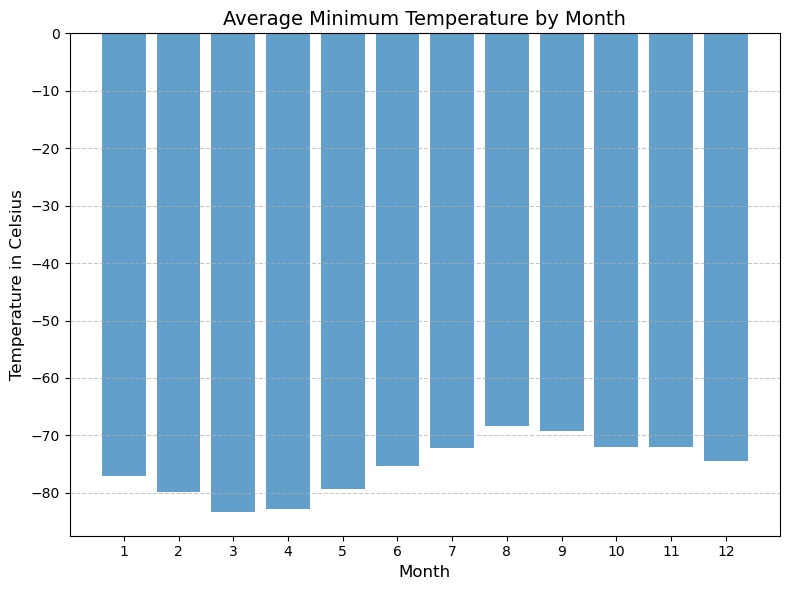

In [35]:
# Plot the average minimum temperature by month
average_min_temp_by_month = mars_weather_df.groupby('month')['min_temp'].mean()
plt.figure(figsize=(8, 6))
plt.bar(average_min_temp_by_month.index, average_min_temp_by_month.values, alpha=0.7)
plt.title('Average Minimum Temperature by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Temperature in Celsius', fontsize=12)
plt.xticks(average_min_temp_by_month.index, fontsize=10, rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


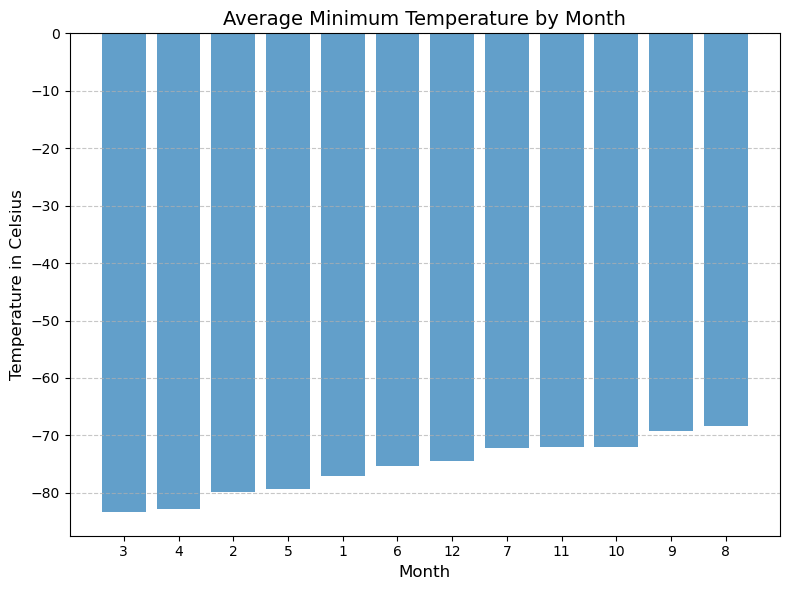

In [43]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_avg_min_temp_by_month = average_min_temp_by_month.sort_values(ascending=True)
plt.figure(figsize=(8, 6))
plt.bar(range(1, 13), sorted_avg_min_temp_by_month.values, alpha=0.7)
plt.title('Average Minimum Temperature by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Temperature in Celsius', fontsize=12)
plt.xticks(range(1, 13), sorted_avg_min_temp_by_month.index, fontsize=10, rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [38]:
# 4. What is the average pressure by month?
average_pressure_by_month = mars_weather_df.groupby('month')['pressure'].mean()
print(average_pressure_by_month)


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


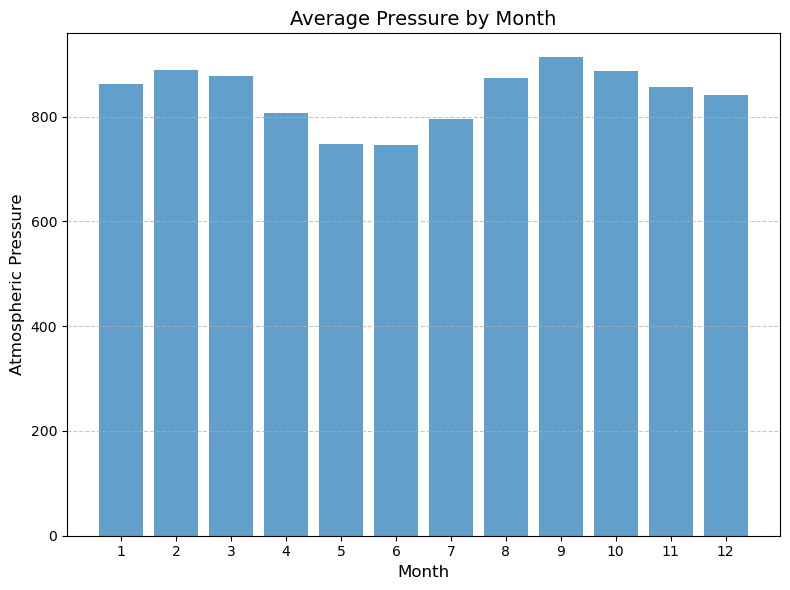

In [40]:
# Plot the average pressure by month
average_pressure_by_month = mars_weather_df.groupby('month')['pressure'].mean()
plt.figure(figsize=(8, 6))
plt.bar(average_pressure_by_month.index, average_pressure_by_month.values, alpha=0.7)
plt.title('Average Pressure by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Atmospheric Pressure', fontsize=12)
plt.xticks(average_pressure_by_month.index, fontsize=10, rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


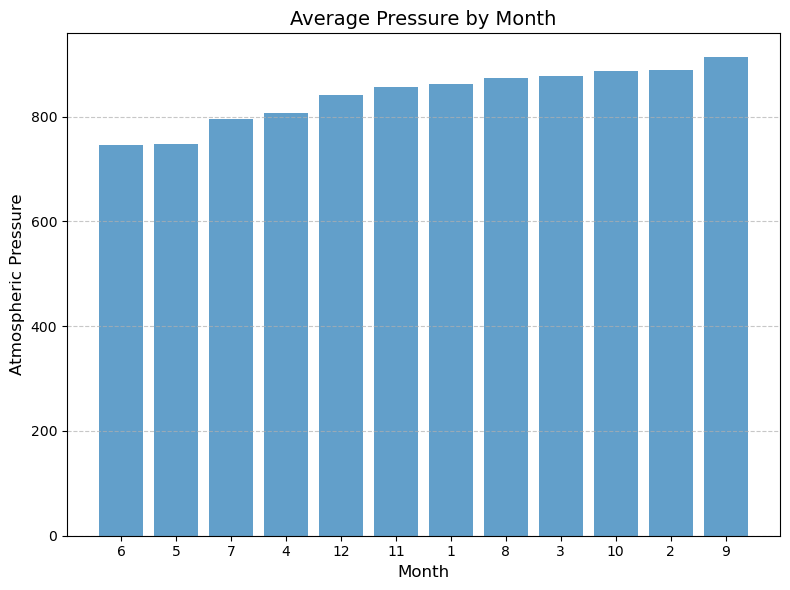

In [47]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_avg_pressure_by_month = average_pressure_by_month.sort_values(ascending=True)
plt.figure(figsize=(8, 6))
plt.bar(range(1, 13), sorted_avg_pressure_by_month.values, alpha=0.7)
plt.title('Average Pressure by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Atmospheric Pressure', fontsize=12)
plt.xticks(range(1, 13), sorted_avg_pressure_by_month.index, fontsize=10, rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



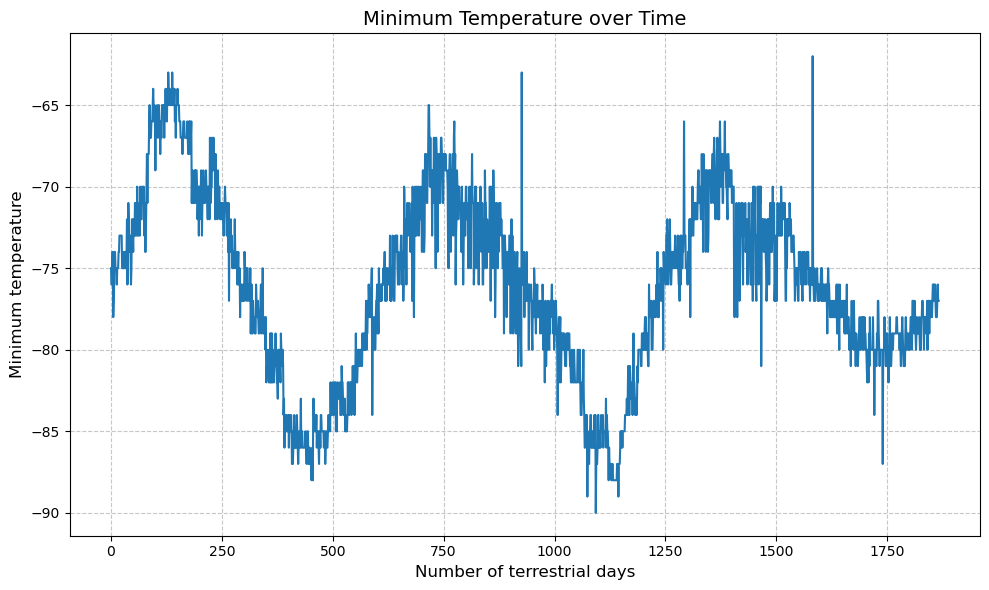

In [45]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.figure(figsize=(10, 6))
plt.plot(mars_weather_df['min_temp'], label='Minimum Temperature')
plt.title('Minimum Temperature over Time', fontsize=14)
plt.xlabel('Number of terrestrial days', fontsize=12)
plt.ylabel('Minimum temperature', fontsize=12)
plt.grid(alpha=0.7, linestyle='--')
plt.tight_layout()
plt.show()


#### Minimum Temperature

Month 3 had the lowest average temperature at approximately -83 degrees celsius. Whereas month 8 had the highest average temperature of -68 degrees celsius.

#### Atmospheric Pressure

Month 6 had the lowest average atmospheric pressureat approximately 745. Whereas month 9 had the highest average atmospheric pressure of 913.

#### Year Length

YOUR ANALYSIS HERE

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [46]:
# Write the data to a CSV
# Save the Mars weather DataFrame to a CSV file
# Specify the file path where you want to save the CSV
file_path = '/Users/zan/Desktop/Data Analytics Course/Module-11-Data-Collection-Challenge/mars_weather_data.csv'
mars_weather_df.to_csv(file_path, index=False)

print(f"The data has been successfully written to '{file_path}'.")



The data has been successfully written to '/Users/zan/Desktop/Data Analytics Course/Module-11-Data-Collection-Challenge/mars_weather_data.csv'.


In [22]:
browser.quit()